# Python Implementation

In [1]:
#Import necessory Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly

import warnings
warnings.filterwarnings('ignore')


In [14]:
# Get the CSV data here and print head
df=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/breast%20cancer.csv',index_col=0)
df.head(25)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890,NaN
842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,NaN
84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758,NaN
84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300,NaN
84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678,NaN
843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440,NaN
844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368,NaN
84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510,NaN
844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720,NaN


In [3]:
#print summary
print('shape     ------------->',df.shape)
print('Each column and data type and its count','\n')
print(df.info())

shape     -------------> (569, 32)
Each column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 

In [7]:
#DROP ALERT 1 : Unnamed :32 column has all nulls.safe to remove the column.
df=df.drop(['Unnamed: 32'],axis=1)

In [8]:
df.shape

(569, 31)

In [9]:
#Dataframe statistics
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


seems no other cols have nulls. It's safe to poceed

As we can see each feature data scaled differently. Let's go ahead and scale the data

In [10]:
scaler= StandardScaler()
x=df.drop('diagnosis',axis=1)
x_scaled=scaler.fit_transform(x)

# Principal component Analysis  (PCA)

PCA is dimension reduction technique (Not feature selection technique)

PCA can be applied only on Features (not on target)

PCA  can be applied when you have too many features and their correlation is not that significant with target.

PCA will also takes care of multicollinearity problem

In [11]:
pca=PCA()
pca.fit_transform(x_scaled)

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

<function matplotlib.pyplot.show(close=None, block=None)>

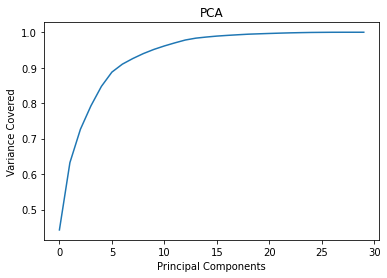

In [12]:
 # Let's plot scree plot to check the best component
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show

Around 13 Principal components are able to explain >95% variance. Its safe to consider starting 13 PC's

In [13]:
pca=PCA(n_components=13)
new_pcomp=pca.fit_transform(x_scaled)
princi_comp=pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398406,-0.157119,-0.877402,0.262950,-0.859012,0.103397
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240991,-0.711904,1.106996,0.813120,0.157929,-0.943537
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097372,0.024066,0.454275,-0.605600,0.124383,-0.410631
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059566,-1.405438,-1.116974,-1.151507,1.011317,-0.933286
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263806,0.377704,0.651359,-0.110516,0.387949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035472,0.987930,0.256988,-0.062648,0.123338,-0.051726
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113359,-0.105207,-0.108632,0.244806,0.222754,-0.192644
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393916,0.520877,-0.840514,0.096474,0.157422
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223081,-0.280243,-0.542037,-0.089299,-0.178636,-0.697472,1.225224


In [15]:
# Replace label column (diagnosis) into binary codes
df['diagnosis']=df['diagnosis'].replace({'M':1,'B':0})
y=df['diagnosis']

In [16]:
# Data split into train and test
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.25,random_state=355)

In [19]:
def print_score(clf,x_train,x_test,y_tain,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n===============Train Result======================")
        
        print(f"Accuracy score:{accuracy_score(y_train,y_pred)* 100:.2f}%")
        
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print('\n===================Test Result=================================')
        print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
        
        print('\n \n Test classification Report \n' ,classification_report(y_test,pred,digits=2))

In [20]:
from sklearn.svm import SVC
svc=SVC()
#svc model training and printing train and test score
svc.fit(x_train,y_train)
# call the function and pass dataset to check train and test score

print_score(svc,x_train,x_test,y_train,y_test,train=True)
print_score(svc,x_train,x_test,y_train,y_test,train=False)


===============Train Result======================
Accuracy score:98.12%

===================Test Result=================================
Accuracy score:97.90%

 
 Test classification Report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        93
           1       1.00      0.94      0.97        50

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



In [21]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()
#GBDT model training and printing train and test score
gbdt.fit(x_train,y_train)

# call the function and pass dataset to check train and test score
print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)



===============Train Result======================
Accuracy score:100.00%

===================Test Result=================================
Accuracy score:94.41%

 
 Test classification Report 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        93
           1       0.94      0.90      0.92        50

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



In [22]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

#Random Forest model training and printing train and test score
rf.fit(x_train,y_train)

# call the function and pass dataset to check train and test score
print_score(rf,x_train,x_test,y_train,y_test,train=True)
print_score(rf,x_train,x_test,y_train,y_test,train=False)



===============Train Result======================
Accuracy score:100.00%

===================Test Result=================================
Accuracy score:96.50%

 
 Test classification Report 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97        93
           1       0.94      0.96      0.95        50

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
# C     = It is a hypermeter in SVM to cntrol error. How much error we can allow.
#         Low C means allowing less number of error/s and
#          Large C means allowing more nuber of errors.

# gamma =Gamma decides that how much curvature we want in a decision boundary.Gamma high means more curvature.
#        Gamma Low means Less curvature.

param_grid={'C' : [1,5,10,20],
           'gamma': [0.001,0.01,0.02,0.002]
           }

In [25]:
gridsearch=GridSearchCV(svc,param_grid)
gridsearch.fit(x_train,y_train)

# best parms
gridsearch.best_params_

{'C': 5, 'gamma': 0.01}

In [26]:
# SVC Model Training and printing train and test score(post param update)

svc = SVC(C= 7, gamma =0.001)
svc.fit(x_train,y_train)

#Call the function and pass dataset to check train and test score

print_score(svc,x_train,x_test,y_train,y_test,train=True)
print_score(svc,x_train,x_test,y_train,y_test,train=False)



===============Train Result======================
Accuracy score:97.65%

===================Test Result=================================
Accuracy score:97.90%

 
 Test classification Report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        93
           1       1.00      0.94      0.97        50

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



# Creating Pipeline

In real world the final model is built with popeline. We work on all preprocessing steps, do EDA, make analysis etc.Once we find all the hyperparameter and feature selection techniquesetc, we use the main techniques and create pipeline.This will be clean and better flow of data through series of sequences.


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [29]:
df=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/breast%20cancer.csv',index_col=0)

In [30]:
x=df.drop(['Unnamed: 32','diagnosis'],axis=1)
y=df.diagnosis
x_train,x_test,y_train,y_test=train_test_split(
x,y,test_size=0.25,random_state=355)

In [32]:
pipe=Pipeline([('Scaler',StandardScaler()),    # fit_transform
              ('PCA' ,PCA(n_components=13)),    # fit_transform
              ('SVM',SVC(C=7,gamma=0.01))])    # ONLY fit

In [33]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('PCA', PCA(n_components=13)),
                ('SVM', SVC(C=7, gamma=0.01))])

In [34]:
y_pred=pipe.predict(x_test)

In [35]:
accuracy_score(y_test,y_pred)

0.9790209790209791

* key points
. you need to know the execution sequence(example- Imputation techniques should be applied before standard scaler and then PCA

. you cannot use pipeline for plotting graphs and analysis.

. Analysis can be done before creating a pipeline

. Do not use unnecessary methods in the pipeline

 you can also use ny encoding/imputation techniques in the pipeline like.
 
 .('Simple Imputer',SinpleImputer(strategy='mean')),#fit_transform
 
 .('Ohe',OneHotEncoder(handle_unknown='ignore')), #fit_transform